In [2]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
# %pylab
# pd.set_option('display.mpl_style', 'default')
# import scipy.integrate
plt.style.use(astropy_mpl_style)

In [3]:
#Need to get rid of 0 points (non readings) and bad readings
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=30,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc_context({'xtick.color':'black', 'ytick.color':'black'})
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7,color='black')
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    
    return fig,ax1,ax2,ax3
def StackedPlot(xlab1='',ylab1='',xlab2='',ylab2='',\
                hspace=0.0,lw=2.5,lfs=45,tfs=30,size_x=20,size_y=11,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    
    fig,axarr =plt.subplots(2,1,figsize=(size_x,size_y),sharex=True,sharey=True)
    gs=gridspec.GridSpec(2,1,height_ratios=(9, 1))
    gs.update(hspace=hspace)
    
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0,color='black')
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0,color='black')
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.set_xticks([3,4,5,6,7,8])
#     ax2.
#     ax2.set_xlim
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
#     ax1.tick_params(axis='x', labelsize= tfs,color='black')
    ax1.yaxis.label.set_color('black')
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    ax2.xaxis.label.set_color('black')
#     ax.tick_params(axis='y', labelsize= tfs, color='black')
    if Grid:
        axs[0].grid()
        axs[1].grid()
    return fig,ax1,ax2

/tmp/ipykernel_4720/350014625.py:7: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/tmp/ipykernel_4720/672772829.py:162: RuntimeWarning: divide by zero encountered in log10
  ax.set_ylim(bottom=-9.5, top=(max(log10(f_nu2)))/2)
/tmp/ipykernel_4720/672772829.py:166: RuntimeWarning: divide by zero encountered in log10
  plt.plot(A,log10(f_nu2),label='Unattenuated')
/tmp/ipykernel_4720/672772829.py:169: RuntimeWarning: divide by zero encountered in log10
  plt.plot(A5,log10(f_nu25),label='Unattenuated-SEL')
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: Runtime

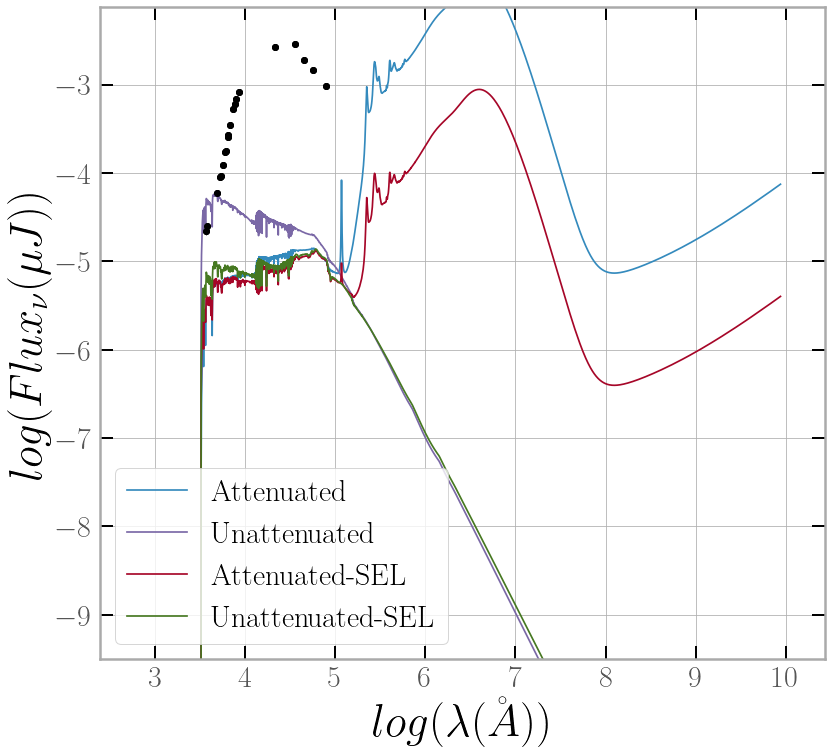

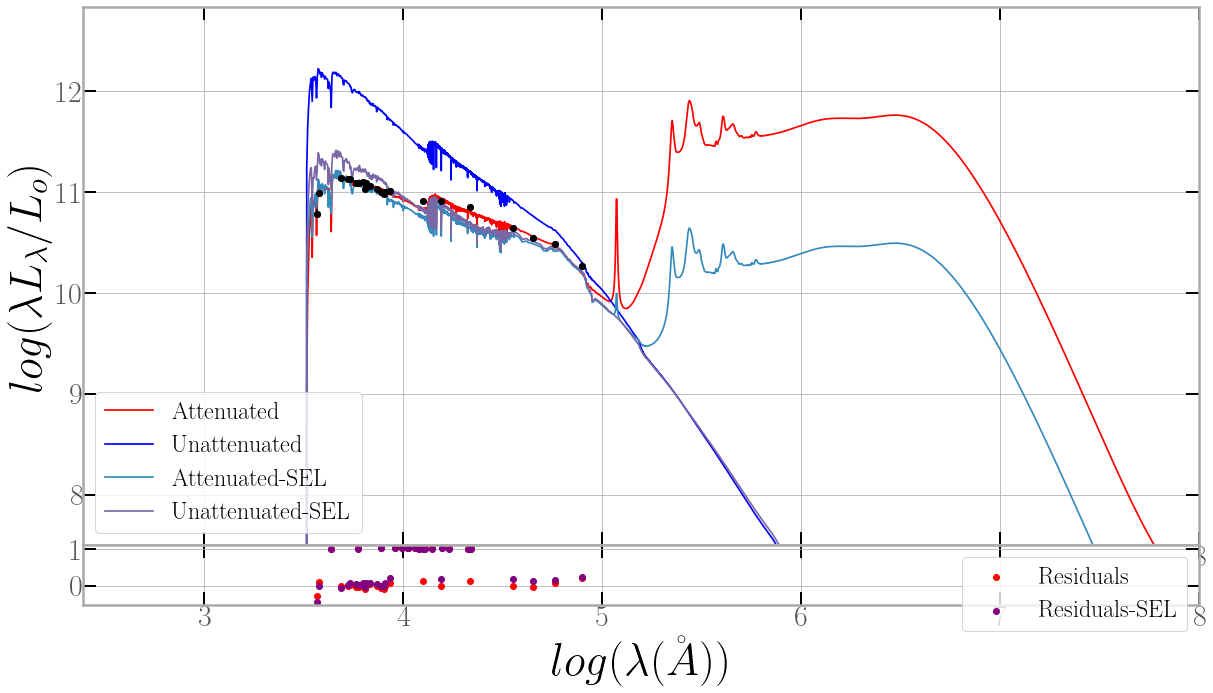

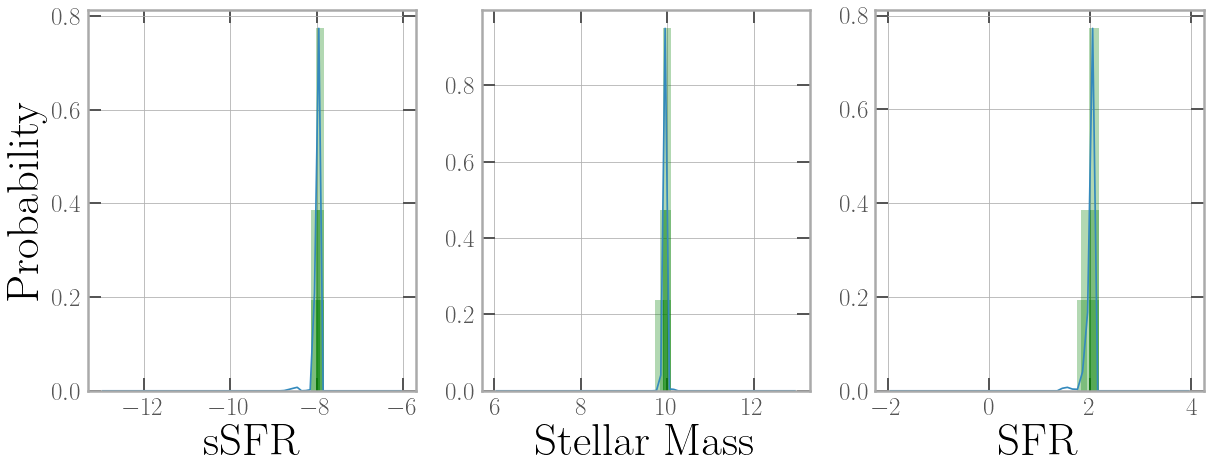

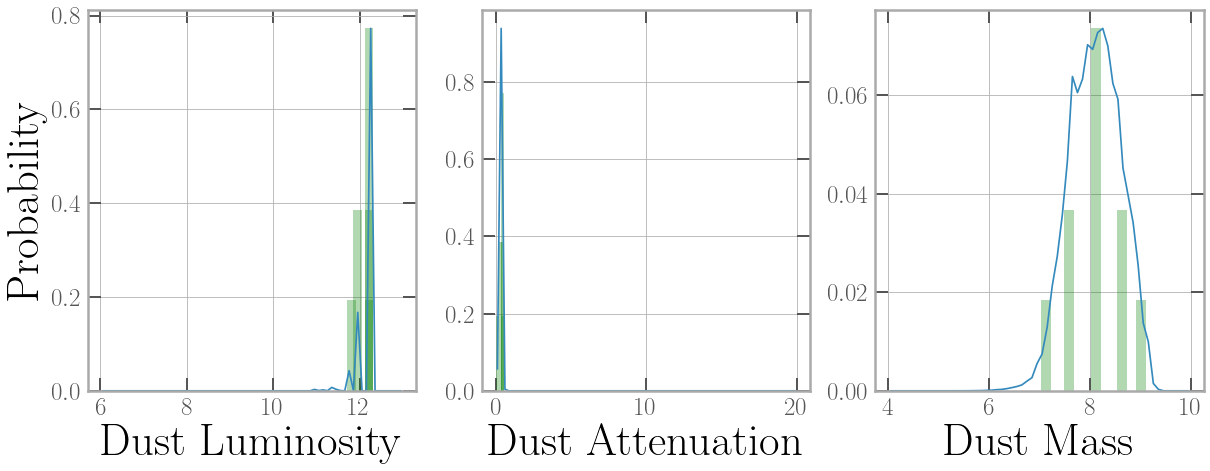

In [5]:
# %%capture
path = os.path.expanduser('~/Documents/H5K/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
path2 = os.path.expanduser('~/Documents/MAR5/')

Montague2 = pd.read_csv(os.path.expanduser(path2+'files/observations.dat'))
# crap=array([1,1,1,1,1,1])
for Treesa in range(1):
    potato=str(1368)
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=0,on_bad_lines='skip')
    short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
    short2 = pd.DataFrame(columns=['Name'])
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    galaxy_fit3 = pd.DataFrame(columns=[])
    galaxy_fit_s = galaxy_fit.drop(galaxy_fit.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])

 ################################################   
    
#     potato=str(Montague['id'][Treesa])
    galaxy_sed5 = pd.read_csv(os.path.expanduser(path2+'/'+potato+'.sed'),index_col=0,on_bad_lines='skip')
    short5 = galaxy_sed5.drop(galaxy_sed5.index[[0,1,2,3,4,5,6,7,8]])
    short25 = pd.DataFrame(columns=['Name'])
    galaxy_fit5 = pd.read_csv(os.path.expanduser(path2+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    galaxy_fit25 = pd.DataFrame(columns=['Full'])
    Filters5 = pd.read_csv(os.path.expanduser(path2+'/files/filters.dat'))
    lambda_c5 =Filters['$\lambda_c$']
    galaxy_fit35 = pd.DataFrame(columns=[])
    galaxy_fit_s5 = galaxy_fit5.drop(galaxy_fit5.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])
    
   ################################################ 
#     chi2 = float(galaxy_fit.index[6].split()[2])
#     chestnut1.append(chi2)
#     Stellar_mass = float(galaxy_fit.index[8].split()[5])
#     sunshine1.append(Stellar_mass)
#     StarForm = float(galaxy_fit.index[8].split()[15])
#     rainbow1.append(StarForm)
    for i in range(len(short)):
        line = short.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=3:
            continue
        str_line = " ".join(str(item) for item in line)
        short2.loc[i]=str(str_line)

    short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

    short2=short2.drop(['Name'],axis=1)
################################################
    for i in range(len(short5)):
        line = short5.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=3:
            continue
        str_line = " ".join(str(item) for item in line)
        short25.loc[i]=str(str_line)

    short25[['A','B','C']] = short25['Name'].str.split(" ",expand=True,)

    short25=short25.drop(['Name'],axis=1)
 ################################################   
    SED = Table.from_pandas(short2)
    A=[float(s) for s in SED['A']]
    B=[float(s) for s in SED['B']]
    C=[float(s) for s in SED['C']]
    #SED FILE is in L_lambda/LoA^-1. A is log of the wavelength in angstroms
 ################################################  
    SED5 = Table.from_pandas(short25)
    A5=[float(s) for s in SED5['A']]
    B5=[float(s) for s in SED5['B']]
    C5=[float(s) for s in SED5['C']]

################################################ 

    redshift =float(galaxy_fit.index[6].split()[-1])
    light=2.998*(10**18) #speed of light in Angstroms ~ A/s
    lambda_cA = lambda_c*10000 #central wavelength in Angstroms
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    dist = meters.value
    B = np.array(B)
    A = np.array(A)
    L_lambda = 10**B #L_0/Angstroms
    lambd = 10**A #Angstroms
    L_nu=L_lambda*lambd**2/light #L_0
    f_nu = (L_nu*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    f_nu = f_nu/10**-26
    # print(f_nu)
################################################
    redshift5 =float(galaxy_fit5.index[6].split()[-1])
#     light=2.998*(10**18) #speed of light in Angstroms ~ A/s
    lambda_cA5 = lambda_c5*10000 #central wavelength in Angstroms
    x5=cosmo.luminosity_distance(redshift5)
    meters5=x5*3.0857*10**22 #Mpc to m
    dist5 = meters5.value
    B5 = np.array(B5)
    A5 = np.array(A5)
    L_lambda5 = 10**B5 #L_0/Angstroms
    lambd5 = 10**A5 #Angstroms
    L_nu5=L_lambda5*lambd5**2/light #L_0
    f_nu5 = (L_nu5*(3.826*10**26)*(1+redshift5))/(4*pi*dist5**2)
    f_nu5 = f_nu5/10**-26
    
    
    
    
   ################################################ 
    
    
    
    
    
    
    
    C = np.array(C)
    L_lambda2=10**C
    L_nu2=L_lambda2*lambd**2/light
    f_nu2 =(L_nu2*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    f_nu2 = f_nu2/10**-26

#Scuffed error calculation. yerr/y *0.434 = error for log plot
################################################
    C5 = np.array(C5)
    L_lambda25=10**C5
    L_nu25=L_lambda25*lambd5**2/light
    f_nu25 =(L_nu25*(3.826*10**26)*(1+redshift5))/(4*pi*dist5**2)
    f_nu25 = f_nu25/10**-26

################################################

    error=0.434*((Montague.iloc[0,3:len(Montague.iloc[0])][::2]*(1+redshift)))/(Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))
    error=[]                                                                           
    for i in range(len((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift)))):
        grape=0.434*((Montague.iloc[0,3:len(Montague.iloc[0])][::2][i]*(1+redshift)))/(Montague.iloc[0,2:len(Montague.iloc[0])][::2][i]*(1+redshift))
    #     list(error)
    #     mylist = list()
        error.append(grape)
    #     print()
    #     list.append(error)
    # error   
    error5=0.434*((Montague2.iloc[0,3:len(Montague2.iloc[0])][::2]*(1+redshift5)))/(Montague2.iloc[0,2:len(Montague2.iloc[0])][::2]*(1+redshift5))
    error5=[]                                                                           
    for i in range(len((Montague2.iloc[0,2:len(Montague2.iloc[0])][::2]*(1+redshift5)))):
        grape5=0.434*((Montague2.iloc[0,3:len(Montague2.iloc[0])][::2][i]*(1+redshift5)))/(Montague2.iloc[0,2:len(Montague2.iloc[0])][::2][i]*(1+redshift5))
    #     list(error)
    #     mylist = list()
        error5.append(grape5)
                                                                               
                                                                           

# fig=plt.figure(figsize=(15,8))
# ax = fig.add_axes([0.15, 0.1, 0.7, 0.7])
# ax.set_ylabel('$log(f_{\nu})$',fontsize='16')
# ax.set_xlabel('$log(\lambda (A))$',fontsize='16')
# ax.set_ylim(bottom=-9.5, top=-3)
    fig,ax=FancyPlot(r'$log(\lambda (\AA))$',r'$log(Flux_{\nu} (\mu J))$')
    ax.set_ylim(bottom=-9.5, top=(max(log10(f_nu2)))/2)
    ax.set_xlim(left=min(A)/1.05,right=max(A)*1.05)
    
    plt.plot(A,log10(f_nu),label='Attenuated')
    plt.plot(A,log10(f_nu2),label='Unattenuated')
    
    plt.plot(A5,log10(f_nu5),label='Attenuated-SEL')
    plt.plot(A5,log10(f_nu25),label='Unattenuated-SEL')
    
    plt.legend()
    plt.scatter(log10(lambda_cA),log10((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))),color='black')
    plt.errorbar(x=log10(lambda_cA),y=log10((Montague.iloc[0,2:len(Montague.iloc[0])][::2]*(1+redshift))),yerr=error,fmt='o',linewidth=0.7,color='black')
    
#     plt.scatter(log10(lambda_cA5),log10((Montague2.iloc[0,2:len(Montague2.iloc[0])][::2]*(1+redshift5))))
#     plt.errorbar(x=log10(lambda_cA5),y=log10((Montague2.iloc[0,2:len(Montague2.iloc[0])][::2]*(1+redshift5))),yerr=error5,fmt='o')
    
    plt.savefig(potato+'nan'+'Flux'+'-Highz',bbox_inches='tight')
# SED
# ((Montague.iloc[0,3:len(Montague.iloc[0])][::2]*(1+redshift)))

# Montague.iloc[0,2:len(Montague.iloc[0])]

# Montague.iloc[0,2:len(Montague.iloc[0])][::2]
###########################################################################################
###########################################################################################
###########################################################################################
    for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=40:
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


    names = []
    for i in range(len(Filters['Name'])):
          names.append(Filters.iloc[i,0])
    names
    galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
    galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    # galaxy_fit2

# galaxy_fit2[]
###########################################################################################
    for i in range(len(galaxy_fit5)):
        line = galaxy_fit5.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=40:
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit25.loc[i]=str(str_line)


    names5 = []
    for i in range(len(Filters['Name'])):
          names5.append(Filters.iloc[i,0])
    names5
    galaxy_fit25[names5] = galaxy_fit25['Full'].str.split(" ",expand=True,)
    galaxy_fit25=galaxy_fit25.drop(['Full'],axis=1)
 ###########################################################################################   
# Filters

    test=Table.from_pandas(galaxy_fit2)
    L_nu=[float(s) for s in test[0]] #First row.
    L_nu_err=[float(s) for s in test[1]] #Second row
    L_nu=np.array(L_nu) #Luminosity per unit Hz - L_o/s^-1 = L_o*s This is a flux unit but it's not Janskys. 
    L_nu_err=np.array(L_nu_err)

    L_nu_err=L_nu_err#*(1+redshift)
    lL_lambda_err=L_nu_err*light/lambda_cA


    L_nu = L_nu*(1+redshift)

    L_lambda=L_nu*light/(lambda_cA)**2 #L_o*s * A/s /A^2 = L_o/A
    lL_lambda=L_lambda*lambda_cA #A *L_o/A =L_o

    yerrz=0.434*(lL_lambda_err)/lL_lambda
    lL_lambda=lL_lambda.tolist()
    for i in range(len(lL_lambda)):
        if lL_lambda[i]<0:
            lL_lambda[i]=nan
    for i in range(len(lL_lambda)):
        if log10(yerrz[i]) > log10(lL_lambda[i]):
            yerrz[i] = nan
#     print(yerrz)
###########################################################################################
    test5=Table.from_pandas(galaxy_fit25)
    L_nu5=[float(s) for s in test5[0]] #First row.
    L_nu_err5=[float(s) for s in test5[1]] #Second row
    L_nu5=np.array(L_nu5) #Luminosity per unit Hz - L_o/s^-1 = L_o*s This is a flux unit but it's not Janskys. 
    L_nu_err5=np.array(L_nu_err5)

    L_nu_err5=L_nu_err5#*(1+redshift)
    lL_lambda_err5=L_nu_err5*light/lambda_cA


    L_nu5 = L_nu5*(1+redshift5)

    L_lambda5=L_nu5*light/(lambda_cA5)**2 #L_o*s * A/s /A^2 = L_o/A
    lL_lambda5=L_lambda5*lambda_cA5 #A *L_o/A =L_o

    yerrz5=0.434*(lL_lambda_err5)/lL_lambda5
    lL_lambda5=lL_lambda5.tolist()
    for i in range(len(lL_lambda5)):
        if lL_lambda5[i]<0:
            lL_lambda5[i]=nan
    for i in range(len(lL_lambda5)):
        if log10(yerrz5[i]) > log10(lL_lambda5[i]):
            yerrz5[i] = nan
###########################################################################################
    # import numpy as np
    arr = np.array(A) #log(A) from SED file
    arr2 = 10**(arr) #Angstroms (A)
    wavelengths = arr2.tolist() #A
    Qlog=log10(wavelengths) #log(A)
    Atten = np.array(B) #log(L_o/A)
    D = (10**Atten)*wavelengths #L_o/A *A = L_o
###########################################################################################
    arr5 = np.array(A5) #log(A) from SED file
    arr25 = 10**(arr5) #Angstroms (A)
    wavelengths5 = arr25.tolist() #A
    Qlog5=log10(wavelengths5) #log(A)
    Atten5 = np.array(B5) #log(L_o/A)
    D5 = (10**Atten5)*wavelengths5 #L_o/A *A = L_o
    # D_nu = D*(arr2**2)/light#(lambda^2)/c * L_lambda
    # print(D_nu)
    # print(X)
    # Flux_at = (D_nu*3.826*10**26)*(1+3.531)/(4*pi*(x)**2)#Joules s-1 m-2
    # Flux_at=Flux_at/10**(-26) #Janksys
    # Flux_at = Flux_at.value.tolist()
    # print(Flux_at)
###########################################################################################
    D=D.tolist()
    # D = (10**Atten)*Q #L_o/A *A = L_o     #*10000) #Luminosity per unit lambda
    Unatten = np.array(C)
    E = (10**Unatten)*wavelengths  
###########################################################################################
    D5=D5.tolist()
    # D = (10**Atten)*Q #L_o/A *A = L_o     #*10000) #Luminosity per unit lambda
    Unatten5 = np.array(C5)
    E5 = (10**Unatten5)*wavelengths5 
    # E_nu = E*(arr2**2)/light
    # Flux_un = (E_nu*3.826*10**26)*(1+3.531)/(4*pi*(x)**2)#Joules s-1 m-2
    # Flux_un = Flux_un/10**(-26) #Janksys
    # Flux_un = Flux_un.value.tolist()
###########################################################################################
    E=E.tolist()     #*10000) #^
    Atten_log=log10(D) #log(L_o)
    Unatten_log=log10(E)
    z=log10(lL_lambda) #log(L_o)
    t=log10(lambda_cA) #log(A)
    # Flux_at_log = log10(Flux_at) #log Janskys
    # Flux_un_log = log10(Flux_un) #log Janskys
    # print(Flux_at_log)
    # print(Atten_log)
###########################################################################################
    E5=E5.tolist()     #*10000) #^
    Atten_log5=log10(D5) #log(L_o)
    Unatten_log5=log10(E5)
    z5=log10(lL_lambda5) #log(L_o)
    t5=log10(lambda_cA5)
###########################################################################################
    L_obs =[float(s) for s in test[2]]#Third Row
    L_obs =np.array(L_obs)
    Res = (L_nu - L_obs*(1+redshift))/L_nu
    for i in range(len(Res)):
        if log10(-Res[i])>2:
            Res[i]=nan
#     fig,ax=plt.subplots()
#     plt.scatter(t,Res)
#     ax.set_ylim(-1.2,1.2)
###########################################################################################
    L_obs5 =[float(s) for s in test5[2]]#Third Row
    L_obs5 =np.array(L_obs5)
    Res5 = (L_nu5 - L_obs5*(1+redshift5))/L_nu5
    for i in range(len(Res5)):
        if log10(-Res5[i])>2:
            Res5[i]=nan
        elif log10(Res5[i])>2:
            Res5[i]=nan
###########################################################################################
#     fig,ax=FancyPlot(r'$log(\lambda (A))$',r'$log(\lambda L_\lambda /L_o )$', size_x=15,size_y=10)
    # ax = fig.add_axes([0.15, 0.1, 0.7, 0.7])
    # ax.set_ylabel('$log(\lambda L_\lambda /L_o )$',fontsize='16')
    # ax.set_xlabel('$log(\lambda (A))$',fontsize='16')
#     fig,ax=FancyPlot(r'$log(\lambda (A))$',r'$log(f_{\nu})$')
#     ax.set_ylim(bottom=-9.5, top=(max(log10(f_nu2)))/2)
#     ax.set_xlim(left=min(A)/1.05,right=max(A)*1.05)
    fig,ax1,ax2=StackedPlot('',r'$log(\lambda L_\lambda /L_o )$',r'$log(\lambda (\AA))$','')
    ax1.set_ylim(bottom=7.5, top=max(Unatten_log)*1.05)
    ax1.set_xlim(left=min(Qlog)/1.05,right=8)
    plt.rcParams['font.size'] = '24'
    ax1.plot(Qlog,Atten_log,label='Attenuated',c='red')
    ax1.plot(Qlog,Unatten_log,label='Unattenuated',c='blue')
    
    ax1.plot(Qlog5,Atten_log5,label='Attenuated-SEL')
    ax1.plot(Qlog5,Unatten_log5,label='Unattenuated-SEL')
    
    ax1.legend()
    ax1.scatter(t,z)#,label='*$\lambda$')
    ax1.errorbar(t,z,yerr=yerrz,fmt='o',c='black')
    
    ax1.scatter(t5,z5)#,label='*$\lambda$')
#     ax1.errorbar(t5,z5,yerr=yerrz5,fmt='o',c='grey')
#     axs[1] = plt.axes([0,0,1,1])
    # Manually set the position and relative size of the inset axes within ax1
#     ip = InsetPosition(ax, [0.2,0.,0.26,0.2])
#     ax2.set_axes_locator(ip)
    ax2.set_xlim(left=min(A)/1.05,right=8)
    ax2.scatter(t,Res,label='Residuals',c='red')
    ax2.scatter(t5,Res5,label='Residuals-SEL',c='purple')
    ax2.legend()
    plt.savefig(potato+'nan'+'Luminosity'+'-Highz',bbox_inches='tight')
    
    for i in range(len(galaxy_fit_s)):
        line = galaxy_fit_s.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=1:
    #         galaxy_fit3 = galaxy_fit3.reset_index(drop=True)
            ok=pd.DataFrame(line)
            galaxy_fit3=pd.concat([galaxy_fit3,ok],axis=1)
            continue

        str_line = " ".join(str(item) for item in line)
        galaxy_fit3.loc[i]=str(str_line)


    Properties=galaxy_fit3.T
    Properties.rename(columns={0:'A',1:'B',2:'C',3:'D',4:'E'}, inplace=True)
    Properties.reset_index(inplace=True,drop=True)
    for col in Properties.select_dtypes(['object']):
        Properties[col] = pd.to_numeric(Properties[col].str.rstrip('%'), errors='coerce')

    fig,ax1,ax2,ax3=HexPlot(r'sSFR',r'Probability',r'Stellar Mass','',r'SFR',wspace=0.20)
#     plt.figure(0)
#     plt.plot(Properties.iloc[0:20]['A'],Properties.iloc[0:20]['B'],label='oops')
#     plt.scatter(Properties.T[21],Properties.iloc[21],label='oops')
#     plt.figure(1)
    ax1.plot(Properties.iloc[232:302]['A'],Properties.iloc[232:302]['B'],label='sSFR')
#     ax1.hist(Properties.iloc[232:302]['B'],bins=20)
    damn =max(Properties.iloc[232:302]['B'])
    prac =array([damn/4,damn/2,damn,damn/2,damn/4,nan])
    ax1.bar(Properties.T[303],prac,alpha=0.3,color='green',width=0.2)
#     plt.figure(2)
#     ax1.scatter(Percentiles_sSFR,Properties.T[254])
    ax2.plot(Properties.iloc[305:375]['A'],Properties.iloc[305:375]['B'],label='Stellar Mass')
    damn2=max(Properties.iloc[305:375]['B'])
    prac2=array([damn2/4,damn2/2,damn2,damn2/2,damn2/4,nan])
#     ax2.hist(Properties.iloc[305:375]['B'],bins=20)
    ax2.bar(Properties.T[376],prac2,alpha=0.3,color='green',width=0.2)
#     ax3.hist(Properties.iloc[603:663]['B'],bins=20)
#     ax3.scatter(Properties.T[664],crap)
#     plt.figure(3)
    ax3.plot(Properties.iloc[735:795]['A'],Properties.iloc[735:795]['B'],label='SFR')
    damn3=max(Properties.iloc[735:795]['B'])
    prac3=array([damn3/4,damn3/2,damn3,damn3/2,damn3/4,nan])
    ax3.bar(Properties.T[796],prac3,alpha=0.3,color='green',width=0.2)
#     plt.figure(4)
    plt.savefig(potato+'Stellar Histograms'+'-MAGPHYS',bbox_inches='tight')
    fig,ax1,ax2,ax3=HexPlot(r'Dust Luminosity',r'Probability',r'Dust Attenuation','',r'Dust Mass',wspace=0.20)
    ax1.plot(Properties.iloc[378:448]['A'],Properties.iloc[378:448]['B'],label='Dust Luminosity')
#     plt.figure(5)
#     ax1.hist(Properties.iloc[378:448]['B'],bins=20)
    damn4=max(Properties.iloc[378:448]['B'])
    prac4=array([damn4/4,damn4/2,damn4,damn4/2,damn4/4,nan])
    ax1.bar(Properties.T[449],prac4,alpha=0.3,color='green',width=0.2)
    ax2.plot(Properties.iloc[589:669]['A'],Properties.iloc[589:669]['B'],label='Dust Attenuation')
    damn5=max(Properties.iloc[589:669]['B'])
    prac5=array([damn5/4,damn5/2,damn5,damn5/2,damn5/4,nan])
#     ax2.hist(Properties.iloc[318:329]['B'],bins=20)
    ax2.bar(Properties.T[670],prac4,alpha=0.3,color='green',width=0.2)
#     ax3.hist(Properties.iloc[540:600]['B'],bins=20)
#     ax3.scatter(Properties.T[601],crap)
#     plt.figure(6)
    ax3.plot(Properties.iloc[672:732]['A'],Properties.iloc[672:732]['B'],label='Dust Mass')
    damn6=max(Properties.iloc[672:732]['B'])
    prac6=array([damn6/4,damn6/2,damn6,damn6/2,damn6/4,nan])
    ax3.bar(Properties.T[733],prac6,alpha=0.3,color='green',width=0.2)
    plt.savefig(potato+'Dust Histograms'+'-MAGPHYS',bbox_inches='tight')


In [56]:
Res5

array([-3.37895234e-01,  4.81611208e-02,  1.50424242e+00, -4.49172577e-02,
       -4.82218204e-03,  5.67659701e-02,  7.55857899e-04,  1.68070707e+00,
       -1.50058275e-02,  4.75995636e-02, -7.81918143e-02,  1.88105118e-02,
        3.89627838e-02,  5.20420708e-02, -2.84481596e-02, -8.66980088e-02,
        1.77151515e+00, -9.29259104e-02, -5.65491846e-03,  1.07272288e-01,
        1.77212121e+00,  1.80808081e+00,  1.83050505e+00,  1.82151515e+00,
        1.83686869e+00,  1.00000128e+00,  7.63471475e-02,  1.86989899e+00,
        2.06565657e+00, -4.55696203e-02,  2.26262626e+00,  2.23737374e+00,
        1.00014848e+00,  2.24242424e+00,  1.50552486e-01,  2.24242424e+00,
       -3.12500000e-02, -5.93451569e-02, -7.88834951e-03,  1.18326118e-01])

In [17]:
Montague

,id,redshift,WFI_U38,WFI_U38*,U,U*,B,B*,IA484,IA484*,...,KsHI,KsHI*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
0,20366,3.531,-5.483530e-08,1.474157e-07,-1.920218e-08,1.451277e-08,7.295418e-08,4.555906e-08,1.635098e-07,5.289903e-08,...,0.000001,8.281339e-08,4.112125e-07,6.862928e-08,6.071316e-07,7.582515e-08,8.668196e-07,7.398355e-07,7.158663e-07,8.068668e-07
1,11462,3.810,-1.730741e-07,1.412119e-07,9.688624e-09,1.539731e-08,1.848744e-07,5.248104e-08,3.709731e-07,4.790290e-08,...,0.000001,7.503430e-08,1.032816e-06,5.747703e-08,1.045007e-06,7.816256e-08,1.214578e-06,5.568519e-07,7.637654e-08,7.231276e-07
2,12533,3.545,2.333313e-08,1.477947e-07,-7.224740e-09,1.570299e-08,2.574843e-07,3.538580e-08,7.198379e-07,5.055784e-08,...,0.000003,7.913625e-08,2.013745e-06,5.472700e-08,3.187537e-06,6.984398e-08,2.739770e-06,5.843974e-07,4.351360e-06,7.036131e-07
3,12552,3.195,2.037470e-07,1.582617e-07,3.017830e-08,1.451277e-08,2.027072e-07,4.905671e-08,2.296839e-07,5.345366e-08,...,0.000001,1.154762e-07,4.336314e-07,5.120638e-08,4.564604e-07,8.840882e-08,2.681679e-07,5.419443e-07,5.906111e-07,6.350032e-07
4,12903,3.097,-4.104241e-08,1.356079e-07,1.025226e-07,1.521109e-08,2.558894e-07,4.313636e-08,4.045890e-07,4.792344e-08,...,0.000001,7.887600e-08,4.230969e-07,5.300548e-08,4.440168e-07,5.839714e-08,-4.293243e-08,6.100103e-07,-1.528582e-06,7.586705e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23511,3.444,2.185058e-07,1.326686e-07,4.220002e-08,1.319516e-08,3.272125e-07,3.325447e-08,3.978211e-07,5.191365e-08,...,0.000002,1.661526e-07,1.105822e-06,6.076241e-08,1.239654e-06,5.351259e-08,7.309251e-07,7.187574e-07,1.310132e-06,8.175869e-07
72,24259,3.509,2.870201e-07,1.222908e-07,-1.987640e-08,1.151945e-08,1.598638e-07,4.379015e-08,4.137364e-07,4.881014e-08,...,0.000003,2.130971e-07,1.125124e-06,6.486456e-08,1.580001e-06,5.684973e-08,1.516494e-06,8.260732e-07,1.083821e-06,9.146839e-07
73,26616,3.521,-9.196342e-08,1.400892e-07,-7.649950e-09,1.319020e-08,1.309476e-07,4.922996e-08,4.295332e-07,5.114637e-08,...,0.000003,2.545299e-07,1.576643e-06,9.733535e-08,1.860037e-06,1.062550e-07,1.256860e-06,8.000680e-07,2.121381e-06,9.078576e-07
74,27445,2.615,7.292188e-07,1.161839e-07,6.866668e-07,1.400810e-08,9.665539e-07,4.115271e-08,1.036937e-06,4.674819e-08,...,0.000002,1.599631e-07,3.056831e-06,7.022924e-08,2.395153e-06,6.562173e-08,3.934005e-06,7.159287e-07,3.368677e-06,8.262652e-07


In [18]:
Montague2

,id,redshift,WFI_U38,WFI_U38*,U,U*,B,B*,IA484,IA484*,...,KsHI,KsHI*,IRAC_36,IRAC_36*,IRAC_45,IRAC_45*,IRAC_58,IRAC_58*,IRAC_80,IRAC_80*
0,1368,2.5687,5.435606e-07,1.872200e-07,8.787606e-07,1.554915e-08,-0.000099,-0.000099,0.000002,5.883347e-08,...,-0.000099,-0.000099,0.000004,1.022617e-07,0.000004,1.440515e-07,0.000004,9.800182e-07,0.000004,0.000001


In [29]:
# Properties.T[302
#             ]
# plt.plot(array([1,2,3,4,5]),array([2,2,2,2,2]))
galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
galaxy_fit2 = pd.DataFrame(columns=['Full'])
Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
galaxy_fit

""
# OBSERVED FLUXES (and errors):
# WFI_U38 U B IA484 IA527 WFI_V IA574 V IA598 IA624 R WFI_Rc IA651 IA679 IA738 IA767 I IA797 F814W IA856 Z F098M J1 F105W J2 NB118 F125W J3 F140W F160W Hs Hl NB209 Ks tenisK KsHI IRAC_36 IRAC_45 IRAC_58 IRAC_80
-3.620E-06 -1.268E-06 4.816E-06 1.079E-05 1.752E-05 2.860E-05 3.333E-05 2.776E-05 2.895E-05 2.969E-05 2.908E-05 2.883E-05 2.340E-05 2.567E-05 3.836E-05 5.731E-06 2.742E-05 3.791E-05 2.811E-05 -4.483E-06 2.961E-05 -6.536E-03 1.250E-05 2.781E-05 7.289E-06 6.317E-05 2.733E-05 6.245E-06 3.338E-05 3.013E-05 6.344E-06 6.575E-05 -1.086E-04 6.462E-05 7.042E-05 8.891E-05 2.715E-05 4.008E-05 5.722E-05 4.726E-05
9.732E-06 9.581E-07 3.008E-06 3.492E-06 3.654E-06 3.545E-06 9.261E-06 2.728E-06 3.553E-06 4.118E-06 1.454E-06 3.170E-06 3.230E-06 4.078E-06 4.429E-06 1.126E-05 5.125E-06 1.272E-05 2.799E-06 1.688E-05 6.811E-06 -6.536E-03 1.393E-05 3.966E-06 1.420E-05 3.349E-05 3.498E-06 1.640E-05 1.183E-05 4.152E-06 2.435E-05 2.432E-05 6.066E-05 3.683E-05 1.933E-05 5.467E-06 4.531E-06 5.006E-06 4.884E-05 5.327E-05
#
# ... Results of fitting the fluxes to the model.....
...
67.5000 6.906E-002
72.5000 3.941E-002
77.5000 1.294E-002


In [32]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# Properties.head(1156)
for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=40:
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


names = []
for i in range(len(Filters['Name'])):
    names.append(Filters.iloc[i,0])
names
galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)

In [26]:
len(names)
# Properties.T[376]

32

(array([34., 18.,  9.,  4.,  2.,  3.,  1.,  2.,  1.,  0.,  1.,  0.,  0.,
         0.,  1.]),
 array([ 0.826     ,  2.27066667,  3.71533333,  5.16      ,  6.60466667,
         8.04933333,  9.494     , 10.93866667, 12.38333333, 13.828     ,
        15.27266667, 16.71733333, 18.162     , 19.60666667, 21.05133333,
        22.496     ]),
 <BarContainer object of 15 artists>)

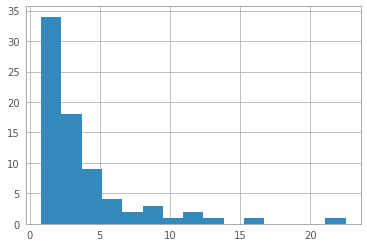

In [7]:
plt.hist(chestnut1,bins=15)

In [11]:
# Properties.iloc[305:377]
%store chestnut1
%store sunshine1
%store rainbow1

Stored 'chestnut1' (list)
Stored 'sunshine1' (list)
Stored 'rainbow1' (list)


In [9]:
# damn =max((Properties.iloc[232:302]['B']))
# damn